In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
dataset_folder_path = "../dataset/"
train_path = dataset_folder_path + "train_users_2.csv"
test_path = dataset_folder_path + "test_users.csv"
session_path = dataset_folder_path + "sessions.csv"

In [3]:
df_session = pd.read_csv(session_path)

In [4]:
ct_action_action_type = pd.crosstab(df_session["action"], df_session["action_type"]) #frequency of (action, action_type) value

In [5]:
ct_action_action_type.head()

action_type,-unknown-,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
action,,,,,,,,,,
10,0,0,0,0,0,3215,0,0,0,0
11,0,0,0,0,0,716,0,0,0,0
12,0,0,0,0,0,2209,0,0,0,0
15,0,0,0,0,0,1053,0,0,0,0
about_us,416,0,0,0,0,0,0,0,0,0


In [6]:
% matplotlib inline
# num of connected action_type to an action
ct_action_action_type["num_connected_action_type"] = [np.count_nonzero(row) for row in ct_action_action_type.values]

In [7]:
ct_action_action_type["num_connected_action_type"].head(20)

action
10                               1
11                               1
12                               1
15                               1
about_us                         1
accept_decline                   1
account                          1
acculynk_bin_check_failed        1
acculynk_bin_check_success       1
acculynk_load_pin_pad            1
acculynk_pin_pad_error           1
acculynk_pin_pad_inactive        1
acculynk_pin_pad_success         1
acculynk_session_obtained        1
active                           1
add_business_address_colorbox    1
add_guest_colorbox               1
add_guests                       1
add_note                         1
agree_terms_check                1
Name: num_connected_action_type, dtype: int64

In [8]:
new_ct_action_action_type = ct_action_action_type.drop(ct_action_action_type.columns.values[:-1], axis=1)

In [9]:
new_ct_action_action_type.head()

action_type,num_connected_action_type
action,
10,1
11,1
12,1
15,1
about_us,1


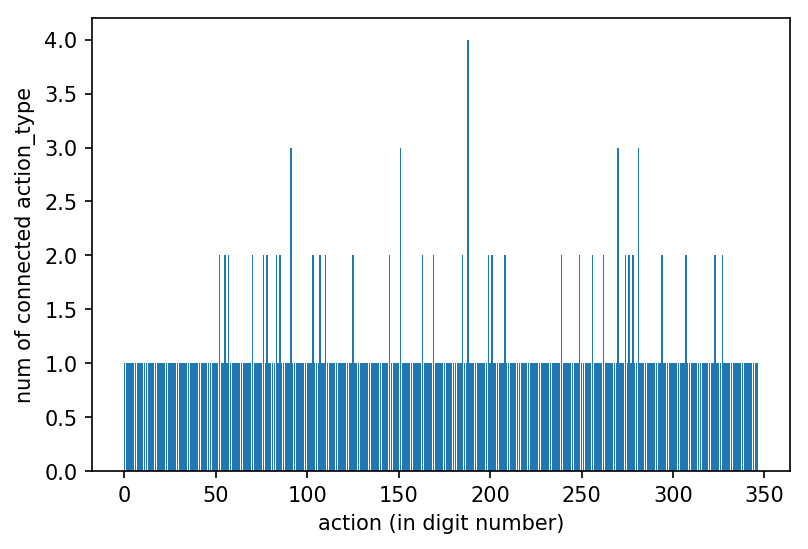

In [10]:
plt.figure(dpi=150)
plt.xlabel("action (in digit number)")
plt.ylabel("num of connected action_type")
plt.bar(range(len(new_ct_action_action_type.index)), new_ct_action_action_type["num_connected_action_type"].values)
plt.show()

In [11]:
ct_action_action_detail = pd.crosstab(df_session["action"], df_session["action_detail"]) #frequency of (action, action_detail) value

In [12]:
ct_action_action_detail.head()

action_detail,-unknown-,account_notification_settings,account_payment_methods,account_payout_preferences,account_privacy_settings,account_transaction_history,admin_templates,airbnb_picks_wishlists,alteration_field,alteration_request,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
action,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
about_us,416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# num of connected action_detail to an action
ct_action_action_detail["num_connected_action_detail"] = [np.count_nonzero(row) for row in ct_action_action_detail.values]

In [14]:
ct_action_action_detail["num_connected_action_detail"].head()

action
10          1
11          1
12          1
15          1
about_us    1
Name: num_connected_action_detail, dtype: int64

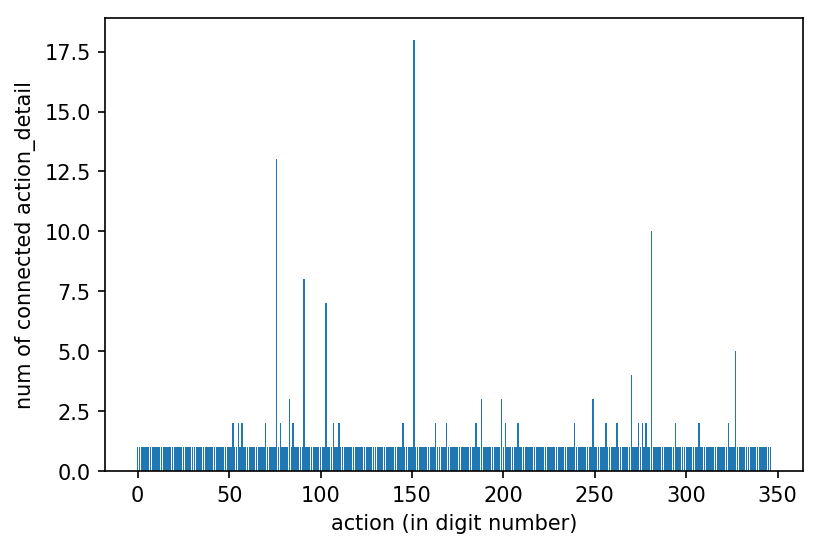

In [15]:
plt.figure(dpi=150)
plt.xlabel("action (in digit number)")
plt.ylabel("num of connected action_detail")
plt.bar(range(len(ct_action_action_detail.index)), ct_action_action_detail["num_connected_action_detail"].values)
plt.show()

In [16]:
# merge data from action, action type, and action detail
df_session["action_merge"] = df_session["action"].apply(str) + df_session["action_type"].apply(str) + df_session["action_detail"].apply(str)

In [17]:
df_session.drop(['action', 'action_type', 'action_detail'], axis=1, inplace=True)

In [18]:
df_action_result_dummy = pd.get_dummies(df_session["action_merge"])

In [19]:
df_device_type_dummy = pd.get_dummies(df_session["device_type"])

In [20]:
df_session.drop(["device_type", "action_merge"], axis=1, inplace=True)

In [21]:
df_session = pd.concat([df_session, df_action_result_dummy, df_device_type_dummy], axis=1)

In [22]:
df_1 = df_session.groupby("user_id")[df_action_result_dummy.columns.values].sum()

In [23]:
df_1.head()

,10message_postmessage_post,11message_postmessage_post,12message_postmessage_post,15message_postmessage_post,about_us-unknown--unknown-,accept_declineviewhost_respond_page,account-unknown--unknown-,acculynk_bin_check_failed-unknown--unknown-,acculynk_bin_check_success-unknown--unknown-,acculynk_load_pin_pad-unknown--unknown-,...,views-unknown--unknown-,views_campaign-unknown--unknown-,views_campaign_rules-unknown--unknown-,viewviewp3,webcam_upload-unknown--unknown-,weibo_signup_referral_finish-unknown--unknown-,why_host-unknown--unknown-,widgetnannan,wishlists-unknown--unknown-,zendesk_login_jwt-unknown--unknown-
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


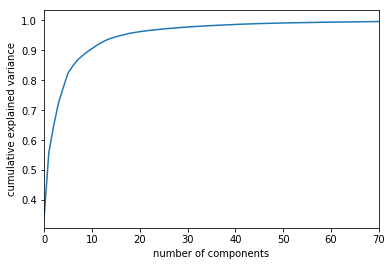

In [24]:
% matplotlib inline
pca = PCA().fit(df_1)
axes = plt.gca()
axes.set_xlim([0,70])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#choose n components that have variance 1


In [25]:
pca = PCA(n_components=60)

In [26]:
action_merge_reduced = pca.fit_transform(df_1)

In [27]:
user_id = df_1.index.values
df_1 = pd.DataFrame(action_merge_reduced, columns=["action_merge_pca_{}".format(i) for i in range(60)])
df_1["user_id"] = user_id 

In [28]:
df_1.set_index("user_id", inplace=True)

In [29]:
df_1.head()

,action_merge_pca_0,action_merge_pca_1,action_merge_pca_2,action_merge_pca_3,action_merge_pca_4,action_merge_pca_5,action_merge_pca_6,action_merge_pca_7,action_merge_pca_8,action_merge_pca_9,...,action_merge_pca_50,action_merge_pca_51,action_merge_pca_52,action_merge_pca_53,action_merge_pca_54,action_merge_pca_55,action_merge_pca_56,action_merge_pca_57,action_merge_pca_58,action_merge_pca_59
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,-7.965902,-2.996490,-3.458344,3.033066,-0.192051,-1.182861,-1.730531,0.055223,-1.009949,-0.816236,...,-0.958685,0.020484,-0.104812,-0.245414,0.440003,-1.575535,-0.269200,0.731445,0.071822,-0.392480
0010k6l0om,1.888653,-7.873850,-2.365809,2.632817,-0.051508,2.173420,-1.794846,-4.347355,2.305193,2.691990,...,-0.230919,-0.094340,-0.126623,-0.014860,-0.013490,-0.033155,-0.073986,0.038280,0.012551,-0.408249
001wyh0pz8,2.520553,36.489749,38.914179,34.371867,-0.186871,-4.288570,0.316476,-0.598560,0.635339,-0.036497,...,-0.125342,0.158755,0.030496,-0.106835,-0.016187,0.184108,0.234931,-0.020721,0.262037,-0.041806
0028jgx1x1,-5.237096,9.567779,-0.755729,3.821808,-0.069114,1.898787,-1.608175,0.292042,-3.302588,0.955449,...,0.038978,-0.148773,0.046929,-0.112913,0.001852,-0.072745,-0.133529,-0.291328,0.228968,-0.231038
002qnbzfs5,76.269101,144.724744,71.596325,-36.891952,-1.261093,-31.219509,-11.398197,-3.842053,70.344432,-27.810494,...,0.627523,-1.678659,1.884261,-2.297282,0.202474,-0.679488,-0.247362,-0.667101,2.810235,-1.721702


In [30]:
df_2 = df_session.groupby("user_id")[df_device_type_dummy.columns.values].sum()

In [31]:
df_2.head()

,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
user_id,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775.0,0.0


In [32]:
df_session['secs_elapsed'].min()

0.0

In [33]:
secs_mean = df_session['secs_elapsed'].mean()

In [34]:
df_session['secs_elapsed'].fillna(0, inplace=True)

In [35]:
df_session['secs_elapsed'].isnull().any()

False

In [36]:
df_3 = df_session.groupby("user_id")["secs_elapsed"].aggregate([np.mean, np.median, np.std, np.amax, np.amin])

In [37]:
df_session_all = pd.concat([df_3, df_2, df_1], axis=1)

In [38]:
df_session_all.head()

,mean,median,std,amax,amin,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,...,action_merge_pca_50,action_merge_pca_51,action_merge_pca_52,action_merge_pca_53,action_merge_pca_54,action_merge_pca_55,action_merge_pca_56,action_merge_pca_57,action_merge_pca_58,action_merge_pca_59
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,21697.400000,843.0,91120.246977,567165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.958685,0.020484,-0.104812,-0.245414,0.440003,-1.575535,-0.269200,0.731445,0.071822,-0.392480
0010k6l0om,9310.206349,847.0,22598.457942,127898.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.230919,-0.094340,-0.126623,-0.014860,-0.013490,-0.033155,-0.073986,0.038280,0.012551,-0.408249
001wyh0pz8,3144.055556,1104.0,6541.226692,50548.0,0.0,0.0,90.0,0.0,0.0,0.0,...,-0.125342,0.158755,0.030496,-0.106835,-0.016187,0.184108,0.234931,-0.020721,0.262037,-0.041806
0028jgx1x1,9580.967742,489.0,17791.419521,84636.0,0.0,30.0,0.0,1.0,0.0,0.0,...,0.038978,-0.148773,0.046929,-0.112913,0.001852,-0.072745,-0.133529,-0.291328,0.228968,-0.231038
002qnbzfs5,8221.901141,498.0,58074.501758,1418284.0,0.0,14.0,0.0,0.0,0.0,0.0,...,0.627523,-1.678659,1.884261,-2.297282,0.202474,-0.679488,-0.247362,-0.667101,2.810235,-1.721702


In [39]:
df_session_all.fillna(-1, inplace=True) #replace unknown value

In [40]:
df_train = pd.read_csv(train_path)

In [41]:
df_test = pd.read_csv(test_path)

In [42]:
df_train_session = pd.merge(df_train, df_session_all, left_on="id", right_index=True, how="left")

In [43]:
df_test_session = pd.merge(df_test, df_session_all, left_on="id", right_index=True, how="left")

In [44]:
df_train_session.to_csv("../dataset/train_session_v8.csv", index=False)

In [45]:
df_train_session.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,action_merge_pca_50,action_merge_pca_51,action_merge_pca_52,action_merge_pca_53,action_merge_pca_54,action_merge_pca_55,action_merge_pca_56,action_merge_pca_57,action_merge_pca_58,action_merge_pca_59
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_test_session.to_csv("../dataset/test_session_v8.csv", index=False)

In [47]:
df_test_session.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,action_merge_pca_50,action_merge_pca_51,action_merge_pca_52,action_merge_pca_53,action_merge_pca_54,action_merge_pca_55,action_merge_pca_56,action_merge_pca_57,action_merge_pca_58,action_merge_pca_59
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,...,0.017569,-0.106530,0.052796,0.024937,-0.030597,-0.021956,-0.028275,-0.216365,0.100201,-0.067005
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,...,0.160207,-0.128101,0.006171,-0.252293,-0.020643,-0.352790,-0.126604,-0.082314,0.175882,-0.270675
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,...,-0.042617,0.017031,0.068412,0.113066,-0.106670,0.386009,-0.145141,0.124452,-0.000429,-0.139843
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,...,-0.090677,-0.026965,0.001395,0.027427,-0.015894,-0.064818,0.025881,-0.152295,-0.013608,-0.050451
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,...,-0.036848,0.168636,-0.241948,-1.109449,-0.682337,-0.693015,-0.400453,0.516705,-0.116499,-0.051540
